In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
import math
import pandas as pd
import numpy as np


# Data Preprocessing


In [2]:
df = pd.read_csv('rumah123_yogya_unfiltered.csv')
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()


price                 0
nav-link              0
description           0
listing-location      0
bed                  19
bath                 21
carport             307
surface_area          1
building_area         1
dtype: int64

In [6]:
df1 = df.dropna(subset=['surface_area', 'building_area'])
df1.isna().sum()

price                 0
nav-link              0
description           0
listing-location      0
bed                  19
bath                 21
carport             306
surface_area          0
building_area         0
dtype: int64

In [7]:
def format_price(price_str):
  if pd.isnull(price_str):
    return None

  price_str = price_str.replace(',', '.').replace('Rp', '').strip()
  if 'Juta' in price_str:
    price_num = float(price_str.replace('Juta', '').strip()) * 1000000
  elif 'Miliar' in price_str:
    price_num = float(price_str.replace('Miliar', '').strip()) * 1000000000
  else:
    try:
      price_num = int(float(price_str))
    except ValueError:
      return None

  return int(price_num)

df2 = df1.copy()

df2['price'] = df1['price'].apply(format_price)

df2.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,1790000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,170000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,695000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,560000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,200000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


In [8]:
def format_area(area_str):
  try:
    area_str = str(area_str).replace('m²', '').strip()
    return int(area_str)
  except (ValueError, TypeError):
    return None

df3 = df1.copy()

df3['surface_area'] = df3['surface_area'].apply(format_area)
df3['building_area'] = df3['building_area'].apply(format_area)
df3['location'] = df1['listing-location'].apply(
    lambda x: x.split(',')[1].strip() if pd.notnull(x) and ',' in x else None
)

df3.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area,location
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120,110,Sleman
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102,126,Sleman
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100,100,Sleman
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109,67,Sleman
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60,30,Sleman


In [9]:
df4 = pd.DataFrame({
    'price': df2['price'],
    'building_area': df3['building_area'],
})

df4_name = ['price', 'building_area']

df4.head()

,price,building_area
0,1790000000,110
1,170000000,126
2,695000000,100
3,560000000,67
4,200000000,30


In [10]:
outliers_index = []

for column in df4_name:
    Q1 = df4[column].quantile(0.25)
    Q3 = df4[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df4[(df4[column] < lower_bound) | (df4[column] > upper_bound)]

    for idx in outliers.index:
        if idx not in outliers_index:
            outliers_index.append(idx)

    print(f"Number of outliers in {column}: {len(outliers)}")

Number of outliers in price: 155
Number of outliers in building_area: 167


In [11]:
df4 = df4.drop(outliers_index)
df4.describe()

,price,building_area
count,1.801000e+03,1801.000000
mean,1.253516e+09,106.305941
std,8.770189e+08,60.974441
min,6.900000e+07,4.000000
25%,5.920000e+08,60.000000
50%,8.970000e+08,90.000000
75%,1.800000e+09,140.000000
max,4.300000e+09,302.000000


# Eksplorasi Data (EDA)

## Pertanyaan pendukung untuk Eksplorasi Data (EDA)

- Bagaimana ringkasan statistik untuk variabel price dan building_area? 

- Distribusi Harga per Meter Persegi

- Berapa harga rata-rata properti secara keseluruhan?

- Kabupaten mana yang punya harga properti tertinggi & terendah secara median?

- Kabupaten mana yang paling banyak listing-nya?

- Harga Median Properti per Lokasi


In [12]:
dfeda = pd.DataFrame({
    'price': df2['price'],
    'building_area': df3['building_area'],
    'location': df3['location']
})

dfeda_name = ['price', 'building_area']

dfeda.head()

,price,building_area,location
0,1790000000,110,Sleman
1,170000000,126,Sleman
2,695000000,100,Sleman
3,560000000,67,Sleman
4,200000000,30,Sleman


Bagaimana ringkasan statistik untuk variabel price dan building_area? 


Statistik Deskriptif untuk price
count    1.801000e+03
mean     1.253516e+09
std      8.770189e+08
min      6.900000e+07
25%      5.920000e+08
50%      8.970000e+08
75%      1.800000e+09
max      4.300000e+09
Name: price, dtype: float64
Skewness: 1.14
Kurtosis: 0.86


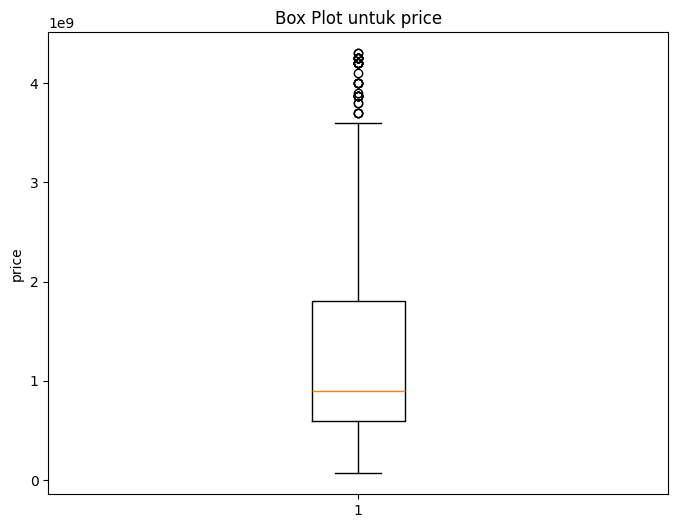

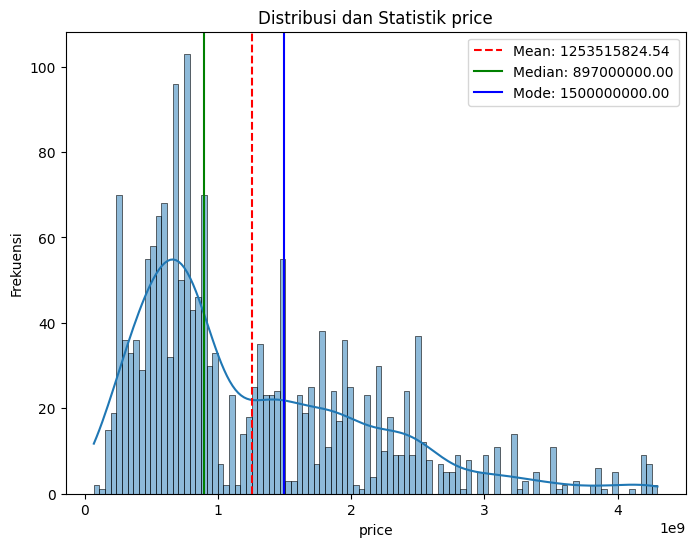


Statistik Deskriptif untuk building_area
count    1801.000000
mean      106.305941
std        60.974441
min         4.000000
25%        60.000000
50%        90.000000
75%       140.000000
max       302.000000
Name: building_area, dtype: float64
Skewness: 0.98
Kurtosis: 0.46


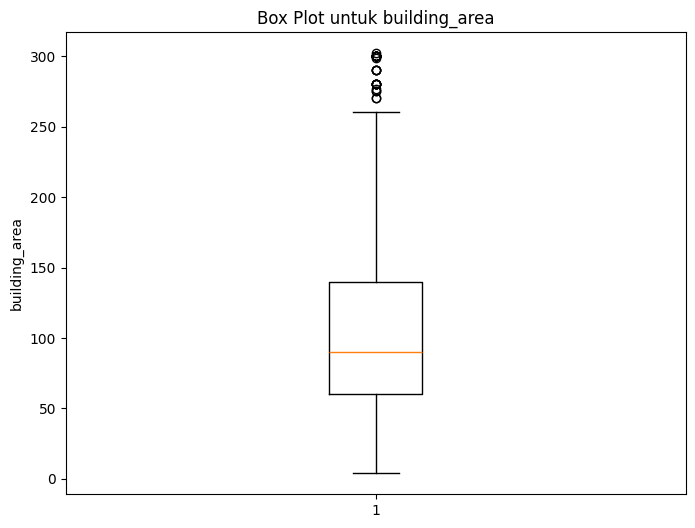

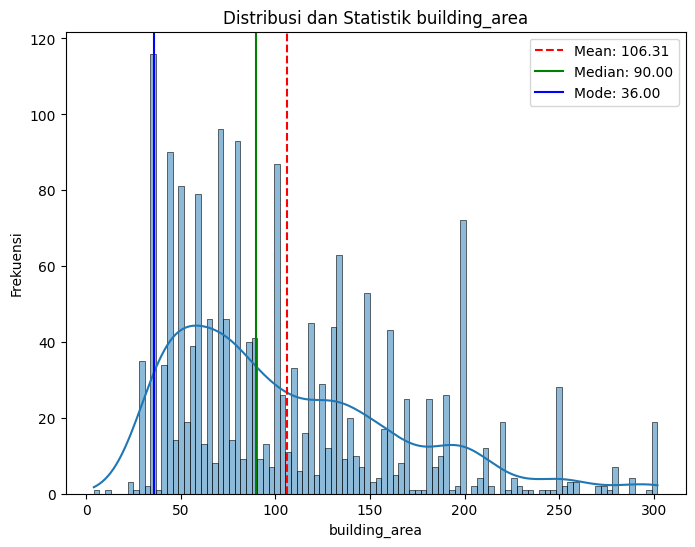

In [13]:
from scipy.stats import skew, kurtosis

for name in df4_name:
    print(f"\nStatistik Deskriptif untuk {name}")
    print(df4[name].describe())
    print(f"Skewness: {skew(df4[name].dropna()):.2f}")
    print(f"Kurtosis: {kurtosis(df4[name].dropna()):.2f}")

    plt.figure(figsize=(8, 6))
    plt.boxplot(df4[name].dropna())
    plt.title(f'Box Plot untuk {name}')
    plt.ylabel(name)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.histplot(df4[name].dropna(), kde=True, bins=100)

    mean_value = df4[name].mean()
    median_value = df4[name].median()
    mode_value = df4[name].mode()[0]

    plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
    plt.axvline(mode_value, color='b', linestyle='-', label=f'Mode: {mode_value:.2f}')

    plt.title(f'Distribusi dan Statistik {name}')
    plt.xlabel(name)
    plt.ylabel('Frekuensi')

    plt.legend()
    plt.show()


Harga Properti: Rata-rata sekitar Rp 1,25 miliar, dengan sebaran harga cukup luas dan beberapa properti sangat mahal (skewness 1.14). Harga berkisar antara Rp 69 juta sampai Rp 4,3 miliar.

Luas Bangunan: Rata-rata 106 m², dengan sebagian besar bangunan lebih kecil dari 90 m². Luas bangunan juga bervariasi dan ada beberapa yang sangat besar (skewness 0.98).

Distribusi Harga per Meter Persegi

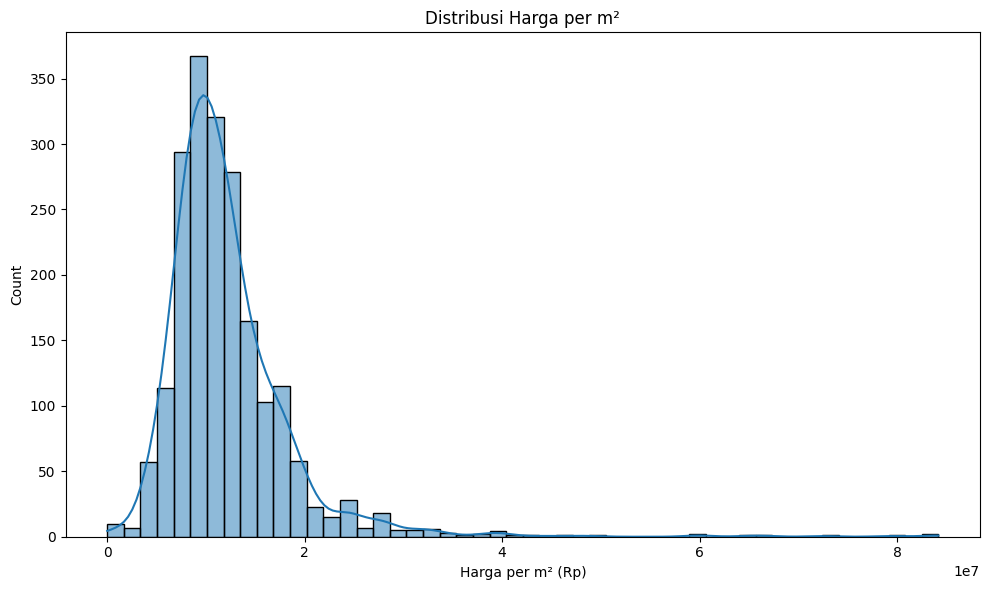

count    2.019000e+03
mean     1.219039e+07
std      6.576206e+06
min      9.966157e-01
25%      8.611111e+06
50%      1.087500e+07
75%      1.419451e+07
max      8.420000e+07
Name: price_per_m2, dtype: float64


In [14]:
dfeda['price_per_m2'] = dfeda['price'] / dfeda['building_area']

plt.figure(figsize=(10,6))
sns.histplot(dfeda['price_per_m2'], bins=50, kde=True)
plt.title('Distribusi Harga per m²')
plt.xlabel('Harga per m² (Rp)')
plt.tight_layout()
plt.show()

print(dfeda['price_per_m2'].describe())

Ada 2019 data valid untuk harga per m²

Rata-rata harga per meter persegi sekitar 12,7 juta rupiah 

Harga per m² bervariasi cukup besar, rata-rata bisa naik turun 6,5 juta 

Berapa harga rata-rata properti secara keseluruhan?



In [15]:
avg_price = dfeda['price'].mean()
print(f"Harga rata-rata properti: Rp {avg_price:,.0f}")

Harga rata-rata properti: Rp 1,840,823,675


Kabupaten mana yang punya harga properti tertinggi & terendah secara median?

In [16]:
median_per_location = dfeda.groupby('location')['price'].median()
max_location = median_per_location.idxmax()
min_location = median_per_location.idxmin()

print(f"Lokasi harga median tertinggi: {max_location} (Rp {median_per_location[max_location]:,.0f})")
print(f"Lokasi harga median terendah: {min_location} (Rp {median_per_location[min_location]:,.0f})")


Lokasi harga median tertinggi: Yogyakarta (Rp 1,500,000,000)
Lokasi harga median terendah: Kulon Progo (Rp 278,000,000)


Kabupaten mana yang paling banyak listing-nya?

In [17]:
listing_count = dfeda['location'].value_counts()
print("Top 5 lokasi dengan listing terbanyak:")
print(listing_count.head())


Top 5 lokasi dengan listing terbanyak:
location
Sleman          1311
Yogyakarta       342
Bantul           321
Kulon Progo       37
Gunung Kidul       8
Name: count, dtype: int64


Harga Median Properti per Lokasi

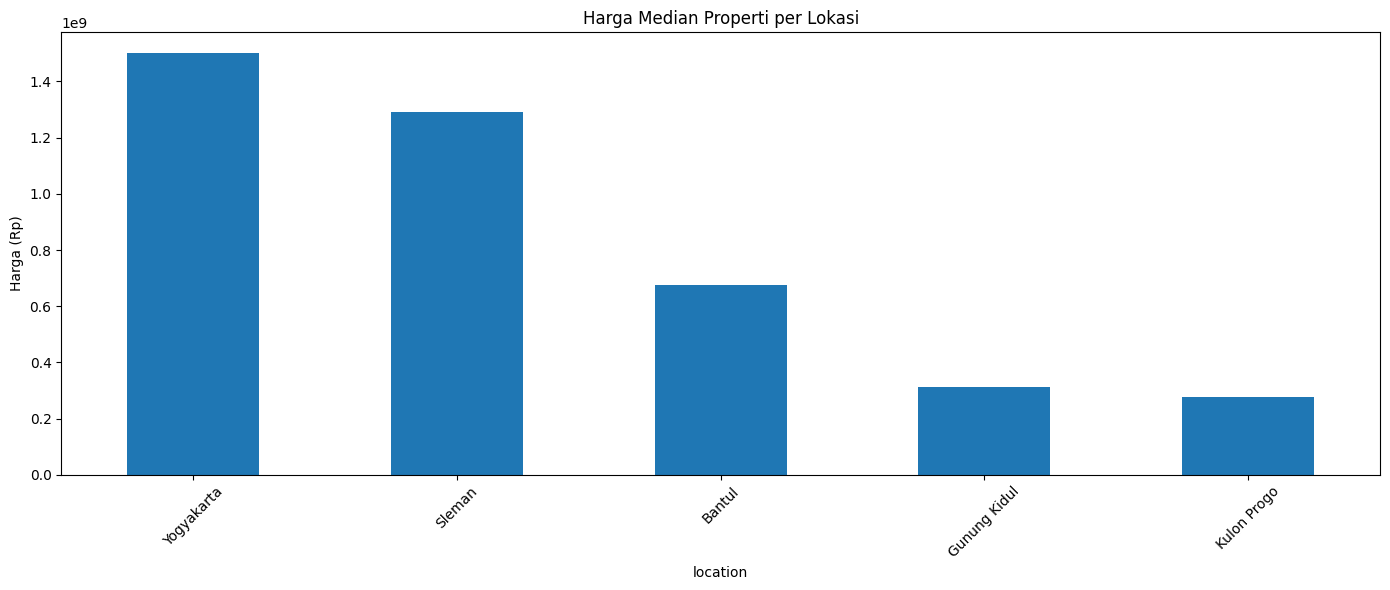

In [18]:
plt.figure(figsize=(14,6))
dfeda.groupby('location')['price'].median().sort_values(ascending=False).plot(kind='bar')
plt.title('Harga Median Properti per Lokasi')
plt.ylabel('Harga (Rp)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# df4.to_csv('cleaned.csv', index=False)

# Pembangunan Model Baseline

In [20]:
X = df4['building_area'].to_numpy()
Y = df4['price'].to_numpy()


In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1440,)
(1440,)
(361,)
(361,)


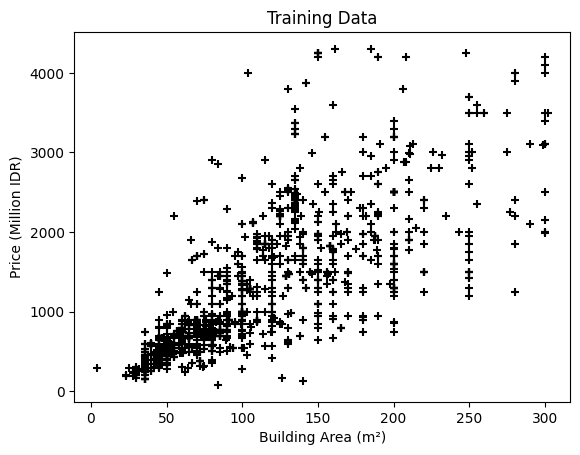

In [22]:
plt.scatter(x_train, y_train / 1_000_000, marker='+', color='black')
plt.title('Training Data')
plt.xlabel('Building Area (m²)')
plt.ylabel('Price (Million IDR)')
plt.show()

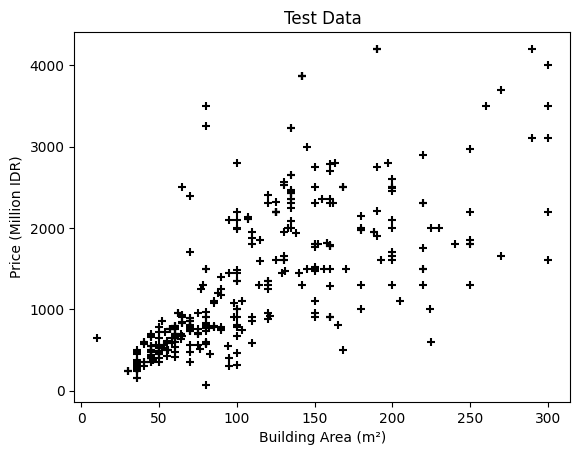

In [23]:
plt.scatter(x_test, y_test / 1_000_000, marker='+', color='black')
plt.title('Test Data')
plt.xlabel('Building Area (m²)')
plt.ylabel('Price (Million IDR)')
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

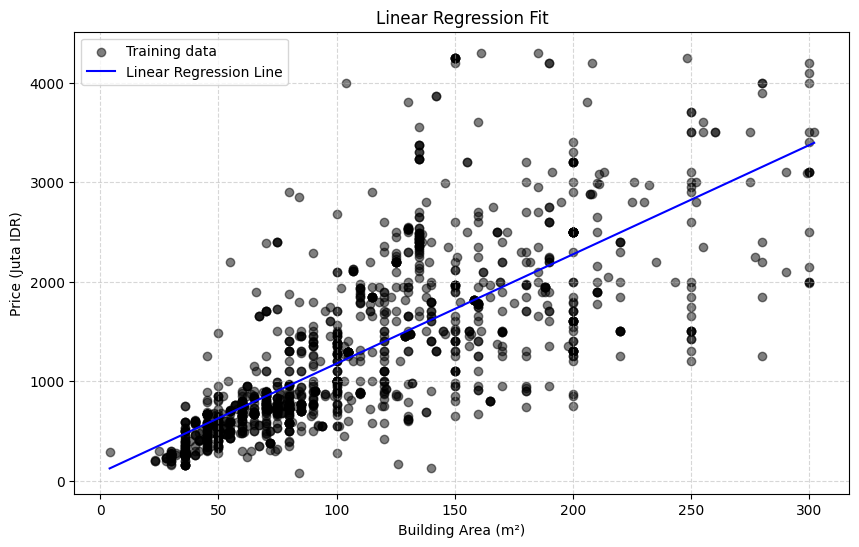

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(x_train, y_train / 1_000_000, color='black', label='Training data', alpha=0.5)

x_line = np.linspace(min(x_train), max(x_train), 100).reshape(-1,1)
y_line = lin_model.predict(x_line) / 1_000_000

plt.plot(x_line, y_line, color='blue', label='Linear Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('Building Area (m²)')
plt.ylabel('Price (Juta IDR)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Eksplorasi Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
}

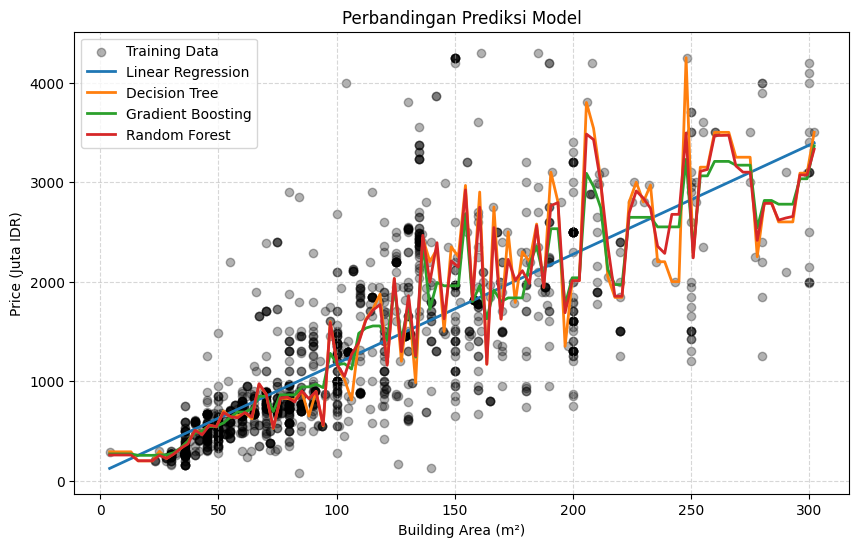

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train / 1_000_000, color='black', alpha=0.3, label='Training Data')

x_line = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)
for name, model in models.items():
    model.fit(x_train.reshape(-1, 1), y_train)
    plt.plot(x_line, model.predict(x_line) / 1_000_000, label=name, linewidth=2)

plt.title('Perbandingan Prediksi Model')
plt.xlabel('Building Area (m²)')
plt.ylabel('Price (Juta IDR)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error

results = []
for name, model in models.items():
    y_train_pred = model.predict(x_train.reshape(-1, 1))
    y_test_pred = model.predict(x_test.reshape(-1, 1))
    
    results.append({
        'Model': name,
        'Train R²': r2_score(y_train, y_train_pred),
        'Test R²': r2_score(y_test, y_test_pred),
        'Train MAE (Juta IDR)': mean_absolute_error(y_train, y_train_pred) / 1_000_000,
        'Test MAE (Juta IDR)': mean_absolute_error(y_test, y_test_pred) / 1_000_000
    })

results_df = pd.DataFrame(results)
print(results_df.to_markdown(index=False))

| Model             |   Train R² |   Test R² |   Train MAE (Juta IDR) |   Test MAE (Juta IDR) |
|:------------------|-----------:|----------:|-----------------------:|----------------------:|
| Linear Regression |   0.586565 |  0.511628 |                377.063 |               427.941 |
| Decision Tree     |   0.726073 |  0.596364 |                280.865 |               358.631 |
| Gradient Boosting |   0.703423 |  0.607107 |                305.738 |               364.271 |
| Random Forest     |   0.721628 |  0.614944 |                288.758 |               354.974 |


In [29]:
def predict_price(model_name, building_area):
    if model_name not in models:
        raise ValueError(f"Model tidak tersedia. Pilih dari: {list(models.keys())}")
    
    prediction = models[model_name].predict([[building_area]])[0]
    print(f"Model: {model_name}")
    print(f"Luas Bangunan: {building_area} m²")
    print(f"Prediksi Harga: Rp {prediction:,.0f}")
    return prediction

In [30]:
predict_price('Gradient Boosting', 150)

Model: Gradient Boosting
Luas Bangunan: 150 m²
Prediksi Harga: Rp 1,958,070,945


1958070945.3080933

In [31]:
def compare_models(building_area):
    predictions = {name: model.predict([[building_area]])[0] for name, model in models.items()}

    plt.figure(figsize=(8, 5))
    bars = plt.bar(predictions.keys(), [p / 1_000_000 for p in predictions.values()])
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:,.0f} Juta',
                 ha='center', va='bottom')
    
    plt.title(f'Prediksi Harga untuk {building_area} m²')
    plt.ylabel('Harga (Juta IDR)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    print("\nDETAIL PERBANDINGAN:")
    print(pd.DataFrame({
        'Model': list(predictions.keys()),
        'Prediksi (Rp)': [f"{p:,.0f}" for p in predictions.values()],
        'Selisih Terkecil': [
            f"Rp {abs(p - min(predictions.values())):,.0f}" 
            if p != min(predictions.values()) else "-"
            for p in predictions.values()
        ]
    }).to_markdown(index=False))

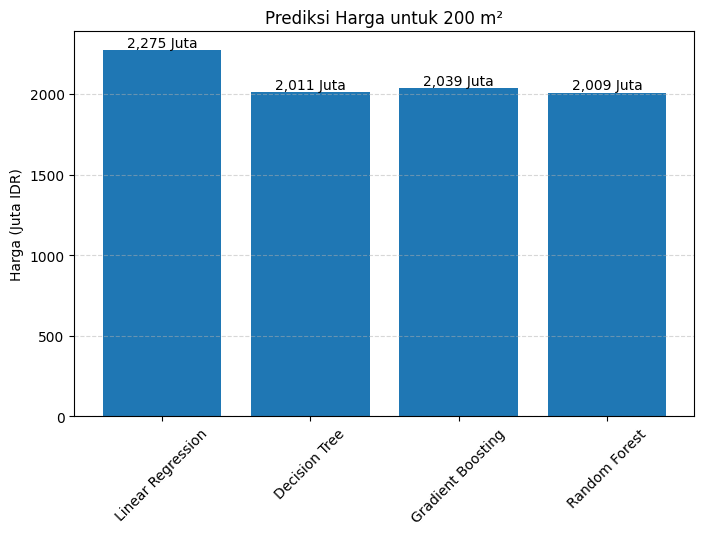


DETAIL PERBANDINGAN:
| Model             | Prediksi (Rp)   | Selisih Terkecil   |
|:------------------|:----------------|:-------------------|
| Linear Regression | 2,274,988,222   | Rp 265,751,461     |
| Decision Tree     | 2,010,950,000   | Rp 1,713,239       |
| Gradient Boosting | 2,038,517,848   | Rp 29,281,087      |
| Random Forest     | 2,009,236,761   | -                  |


In [32]:
compare_models(200)

In [33]:
import joblib

joblib.dump(models['Linear Regression'], 'linear_model.pkl')
joblib.dump(models['Decision Tree'], 'tree_model.pkl')
joblib.dump(models['Gradient Boosting'], 'gboost_model.pkl')
joblib.dump(models['Random Forest'], 'forest_model.pkl')


['forest_model.pkl']